Le module keras permet de définir facilement des réseaux de neurones en les décrivant couche par couche.
Pour l’instant nous définissons les poids à la main, en attendant de voir plus tard comment les calculer avec la machine. Pour commencer nous allons créer le réseau de neurones correspondant à la figure suivante

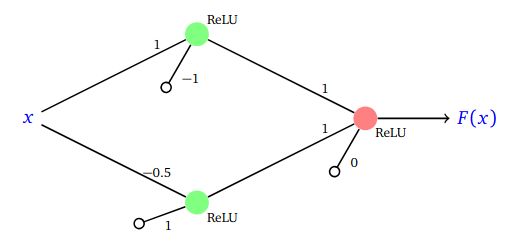

#  Module keras de tensorflow

En plus d’importer le module numpy (abrégé par np), il faut importer le sous-module keras du module tensorflow et quelques outils spécifiques :

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

##  Couches de neurone
Nous allons définir l’architecture d’un réseau très simple, en le décrivant couche par couche.

In [2]:
# Architecture du réseau
modele = Sequential()

# Couches de neurones
modele.add(Dense(2, input_dim=1, activation='relu'))
modele.add(Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Explications :

• Notre réseau s’appelle modele, il est du type Sequential, c’est-à-dire qu’il va être décrit par une suite de couches les unes à la suite des autres.
• Chaque couche est ajoutée à la précédente par modele.add(). L’ordre d’ajout est donc important.

• Chaque couche est ajoutée par une commande :
**modele.add(Dense(nb_neurones, activation=ma_fonction))**

• Une couche de type Dense signifie que chaque neurone de la nouvelle couche est connectée à toutes les sorties des neurones de la couche précédente.

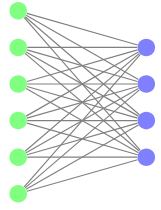

 Pour chaque couche, il faut préciser le nombre de neurones qu’elle contient. S’il y a $n$ neurones alors la couche renvoie $n$ valeurs en sortie. On rappelle qu’un neurone renvoie la même valeur de sortie vers tous les neurones de la couche suivante.


Pour la première couche, il faut préciser le nombre de valeurs en entrée (par l’option **input_dim = ...**). Dans le code ici, on a une entrée d’une seule variable. Sur la figure ci-dessous un exemple d’une
entrée de dimension 3.


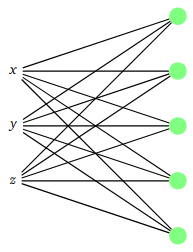

Pour les autres couches, le nombre d’entrées est égal au nombre de sorties de la couche précédente. Il
n’est donc pas nécessaire de le préciser.

Pour chaque couche, il faut également préciser une fonction d’activation (c’est la même pour tous les
neurones d’une même couche). Plusieurs fonctions d’activation sont prédéfinies :
'relu' (ReLU), 'sigmoid' (σ), 'linear' (identité).

Nous verrons plus tard comment définir notre propre fonction d’activation, comme par exemple la fonction marche de Heaviside

Notre exemple ne possède qu’une entrée et comme il n’y a qu’un seul neurone sur la dernière couche alors
il n’y a qu’une seule valeur en sortie. Ainsi notre réseau va définir une fonction $$F:\mathbb{R} → \mathbb{R}, x→F(x)$$.
Mais attention, pour l’instant ce n’est qu’un modèle de réseau puisque nous n’avons pas fixé de poids.

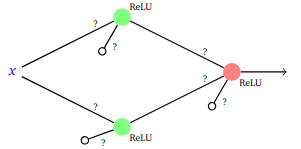

Pour vérifier que tout va bien jusque là, on peut exécuter la commande
**modele.summary()**
qui affiche un résumé des couches et du nombre de poids à définir. Appliquer cette commande et observer le résultat.

In [3]:
modele.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

##  Les poids

Lors de la définition d’un réseau et de la structure de ses couches, des poids aléatoires sont attribués à
chaque neurone. La démarche habituelle est ensuite d’entraîner le réseau, automatiquement, afin qu’il
trouve de « bons » poids. Mais pour l’instant, nous continuons de fixer les poids de chaque neurone à la
main.
La commande pour fixer les poids est **set_weights()**.
Nous allons utiliser les poids suivant

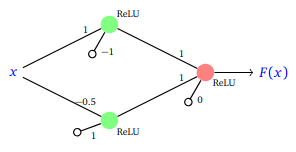

Voici la définition des poids de la première couche, numérotée 0 :

In [19]:
# Couche 0
coeff = np.array([[1.,-0.5]])
biais = np.array([-1,1])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

Définir les poids de la couche numéro 1 :

In [22]:
# Couche 1
coeff = np.array([[1.],[1.]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)


Voici quelques précisions concernant la commande **set_weights()**. Son utilisation n’est pas très aisée.

• Les poids sont définis pour tous les éléments d’une couche, par une commande **set_weights(poids)**.

• Les poids sont donnés sous la forme d’une liste : **poids = [coeff,biais]**.

• Les biais sont donnés sous la forme d’un vecteur de biais (un pour chaque neurone).

• Les coefficients sont donnés sous la forme d’un tableau à deux dimensions. Ils sont définis par entrée.

Attention, la structure n’est pas naturelle (nous y reviendrons).



À vous : dire ce que renvoie l'instruction **modele.layers[0].get_weights()** et à quoi correspond elle?

In [24]:
print(modele.layers[0].get_weights())

[array([[ 1. , -0.5]], dtype=float32), array([-1.,  1.], dtype=float32)]


Poids de la couche 0

## Évaluation

Comment utiliser le réseau ? C’est très simple avec predict(). Notre réseau définit une fonction $x→F(x)$.
L’entrée correspond donc à un réel et la sortie également. Voici comment faire

In [ ]:
#entree = np.array([[VALEUR])
#sortie = modele.predict(entree)

À vous. Donner la sortie prédite. Vérifier le calcule à la main en calculant la sortie de chaque neurone.

In [28]:
entree = np.array([[3]])
sortie = modele.predict(entree)
print("Sortie : ",sortie)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Sortie :  [[2.]]


3*1-1=2

3*(-1/2)+1 =-1+1=0

2*1 + 1*0 + 0 = 2

=> F(3)=2


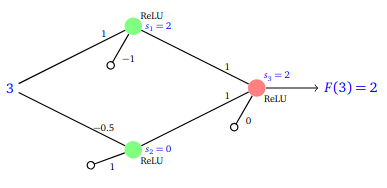

# Visualisation

Afin de tracer le graphe de la fonction $F:\mathbb{R}→\mathbb{R}$, on peut calculer d’autres valeurs :

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


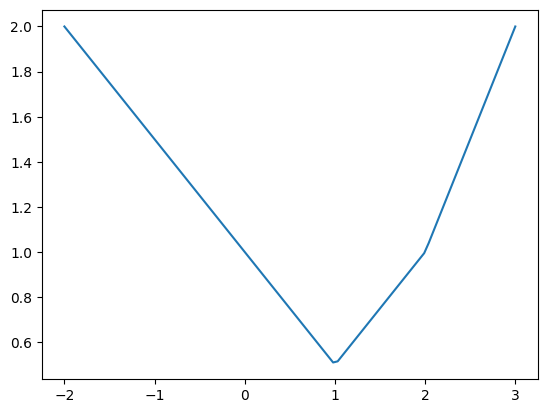

In [29]:
import matplotlib.pyplot as plt
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

Commentez le graphique ci-dessus

La fonction decroisse lineaire sur [-2,1] et vaut 0

Apres sur [1,2] la fonction croisse et vaut 1 et apres la fonction croisse et vaut 2 sur [2,3]

# Créer votre perceptron

Prédire la sortie pour $x=3$ et affichez sur la plage de valeur $x\in[-2,3]$ les sortie du perceptron suivant

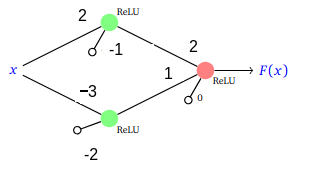

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prédiction pour x=3 :  [[10.]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


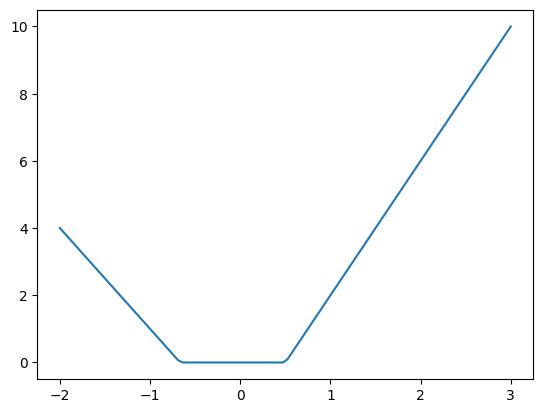

In [39]:
# Architecture du réseau
modele1 = Sequential()

# Couches de neurones
modele1.add(Dense(2, input_dim=1, activation='relu'))
modele1.add(Dense(1, activation='relu'))

# Couche 0
coeff = np.array([[2.,-3.]])
biais = np.array([-1,-2])
poids = [coeff,biais]
modele1.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[2.],[1.]])
biais = np.array([0])
poids = [coeff,biais]
modele1.layers[1].set_weights(poids)

# Prédire la sortie pour x=3
entree = np.array([[3]])
sortie = modele1.predict(entree)
print("Prédiction pour x=3 : ", sortie)

# Afficher la sortie pour x=3 sur la plage de valeur x∈[-2,3]
import matplotlib.pyplot as plt
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele1.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)

Changer le coefficient du second neurone de la première couche (-3) par 3. Commenter le changement sur la courbe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prédiction pour x=3 :  [[17.]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


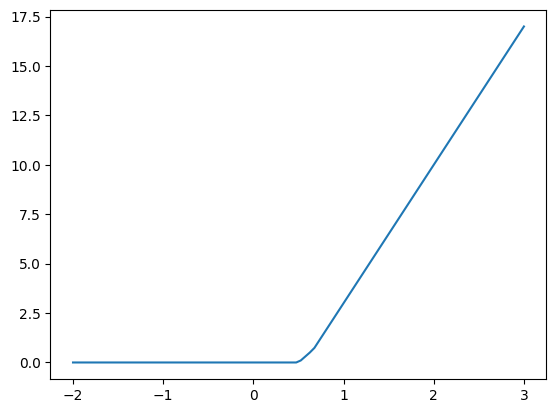

In [40]:
# Architecture du réseau
modele1 = Sequential()

# Couches de neurones
modele1.add(Dense(2, input_dim=1, activation='relu'))
modele1.add(Dense(1, activation='relu'))

# Couche 0
coeff = np.array([[2.,3.]])
biais = np.array([-1,-2])
poids = [coeff,biais]
modele1.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[2.],[1.]])
biais = np.array([0])
poids = [coeff,biais]
modele1.layers[1].set_weights(poids)

# Prédire la sortie pour x=3
entree = np.array([[3]])
sortie = modele1.predict(entree)
print("Prédiction pour x=3 : ", sortie)

# Afficher la sortie pour x=3 sur la plage de valeur x∈[-2,3]
import matplotlib.pyplot as plt
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele1.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)

Le graphique se change parce que la valeur final est change

Prédire la sortie pour $x=3$ et affichez sur la plage de valeur $x\in[-2,3]$ les sortie du perceptron suivant

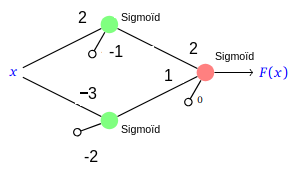

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prédiction pour x=3 :  [[0.8793862]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


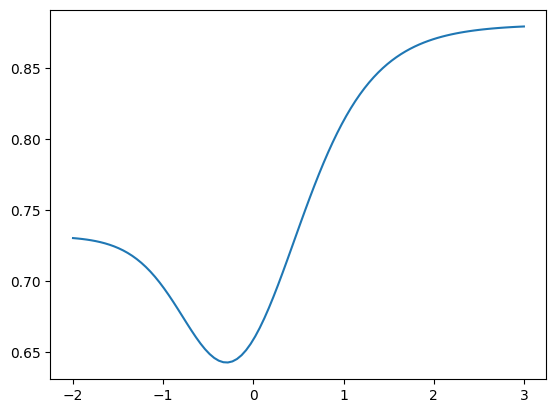

In [41]:
# Architecture du réseau
modele1 = Sequential()

# Couches de neurones
modele1.add(Dense(2, input_dim=1, activation='sigmoid'))
modele1.add(Dense(1, activation='sigmoid'))

# Couche 0
coeff = np.array([[2.,-3.]])
biais = np.array([-1,-2])
poids = [coeff,biais]
modele1.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[2.],[1.]])
biais = np.array([0])
poids = [coeff,biais]
modele1.layers[1].set_weights(poids)

# Prédire la sortie pour x=3
entree = np.array([[3]])
sortie = modele1.predict(entree)
print("Prédiction pour x=3 : ", sortie)

# Afficher la sortie pour x=3 sur la plage de valeur x∈[-2,3]
import matplotlib.pyplot as plt
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele1.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)

## Réseaux pour variables multi dimensionnelles

Essayons avec une variable de dimension 2. Nous remplaçons le terme 'sigmoïd' par $\sigma$ par souci de lecture.

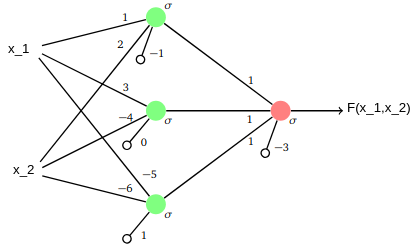

In [42]:
# Architecture du réseau
modele = Sequential()
# Couches de neurones
modele.add(Dense(3, input_dim=2, activation='sigmoid'))
modele.add(Dense(1, activation='sigmoid'))

La première couche possède 3 neurones, chacun ayant deux entrées. La seconde couche n’a qu’un seul neurone (qui a automatiquement 3 entrées). La fonction d’activation est partout la fonction $\sigma$

In [43]:
# Couche 0
coeff = np.array([[1.0,3.0,-5.0],[2.0,-4.0,-6.0]])
biais = np.array([-1.0,0.0,1.0])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

Remarquez que les poids ne sont pas définis neurone par neurone, mais par entrée : d’abord les poids de la première entrée pour chaque neurone, puis les poids de la seconde entrée pour chaque neurone, etc.

Définir la couche 1

In [44]:
# Couche 1
coeff = np.array([[1.],[1.],[1.]])
biais = np.array([-3])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)

Donner la sortie associée à la variable (7,−5)

In [47]:
# Prédire la sortie pour (x1,x2)=(7,-5)
entree = np.array([[7.,-5.]])
sortie = modele.predict(entree)
print("Prédiction pour (7,-5) : ", sortie)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prédiction pour (7,-5) :  [[0.12303182]]


 Voici comment tracer le graphe de $F : \mathbb{R}^2 → \mathbb{R}$.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


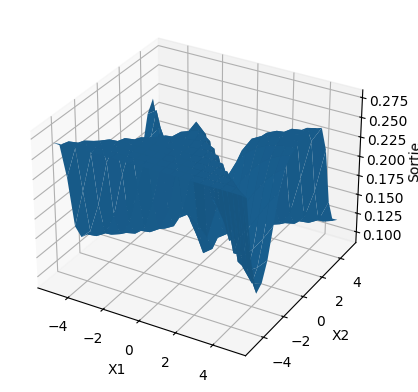

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
VX1 = np.linspace(-5, 5, 20)
VX2 = np.linspace(-5, 5, 20)
X1,X2 = np.meshgrid(VX1, VX2)
entree = np.c_[X1.ravel(), X2.ravel()]
sortie = modele.predict(entree)
Y = sortie.reshape(X1.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2,  Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Sortie')
plt.show()

Commenter chaque ligne du code ci-dessous en expliquant son utilité

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
VX1 = np.linspace(-5, 5, 20) # 20 valeurs entre -5 et 5
VX2 = np.linspace(-5, 5, 20) # 20 valeurs entre -5 et 5
X1,X2 = np.meshgrid(VX1, VX2) # On crée une grille de points
entree = np.c_[X1.ravel(), X2.ravel()] # On transforme la grille en tableau numpy
sortie = modele.predict(entree) # On prédit la sortie
Y = sortie.reshape(X1.shape) # On transforme la sortie en matrice
fig = plt.figure() # On crée une figure 3D
ax = plt.axes(projection='3d') # On crée un axe 3D
ax.plot_surface(X1, X2,  Y) # On trace la surface
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Sortie')
plt.show()

# Codage de sa propre fonction d'activation

Les fonction d'activations $H$ type linear ($f(x)=ax+b$) ou Heaviside ne sont pas directement implémenter sous Keras. Voici comment coder votre propre fonction Heaviside par exemple

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.utils import get_custom_objects

# Définir la fonction d'activation Heaviside en utilisant TensorFlow
from tensorflow.keras import backend as K


def heaviside(x):
	""" Définis la fonction de Heaviside qui n'est pas défini
	par défaut dans keras. A utiliser comme fonction
	d'activiation lors de la définition d'une couche par exemple
	    modele.add(Dense(4,activation=heaviside))
	Attention il n'y a pas de guillemet ici."""
	return tf.where(x >= 0 , 1 , 0)


Coder le perceptron suivant et afficher la sortie pour $x\in[-2;3]$

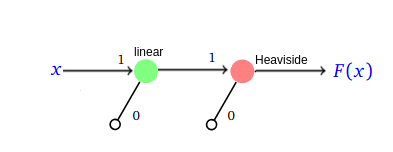

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0.5, 1.0, 'Sortie du perceptron pour x dans [-2,3]')

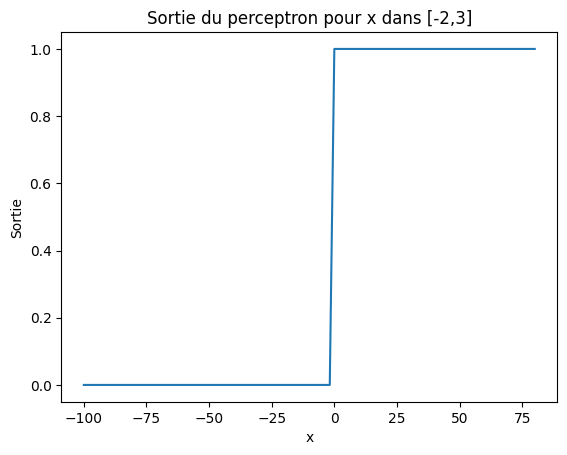

In [55]:
#Coder le perceptron et afficher la sortie pour x appartenant à l'intervalle [-2,3]

# Architecture du réseau
modele = Sequential()
# Couches de neurones
# la première couche est linéaire par défaut
modele.add(Dense(1, input_dim=1, activation='linear'))
modele.add(Dense(1, activation=heaviside))

# Couche 0
coeff = np.array([[1.0]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[1.0]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)

# Afficher la sortie pour x appartenant à l'intervalle [-2,3]
liste_x = np.linspace(-100, 80, num=100) # 100 valeurs entre -2 et 3
entree = np.array([[x] for x in liste_x]) # On transforme la liste en tableau numpy
sortie = modele.predict(entree) # On prédit la sortie
liste_y = np.array([y[0] for y in sortie]) # On transforme la sortie en liste
plt.plot(liste_x,liste_y) # On trace la courbe
plt.xlabel('x')
plt.ylabel('Sortie')
plt.title('Sortie du perceptron pour x dans [-2,3]')


# Approximation de fonction

Nous allons montrer comment approximer une fonction à l'aide d'un réseau de neurone.
Définissons une fonction arbitrairement

In [53]:
def f(x):
  return np.cos(2*x) + x*np.sin(3*x) + x**0.5

Affichons cette fonction pour l'intervalle $[0;10]$ :

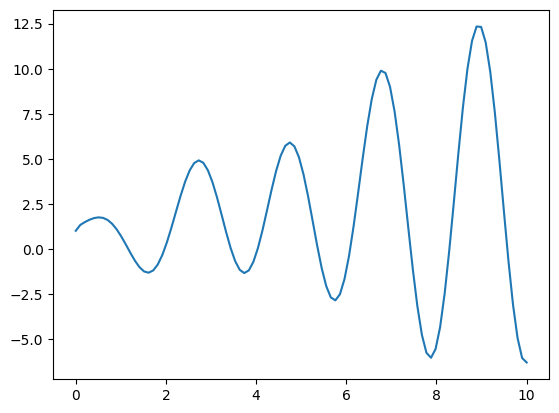

In [54]:
import matplotlib.pyplot as plt
a=0
b = 10
liste_x = np.linspace(a, b, num=100)
liste_y = f(liste_x)
plt.plot(liste_x,liste_y)
plt.show()

Essayer d'approximer cette fonction à l'aide d'un ensemble de couche (éventuellement en série) de type Heavyside et linéaire

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


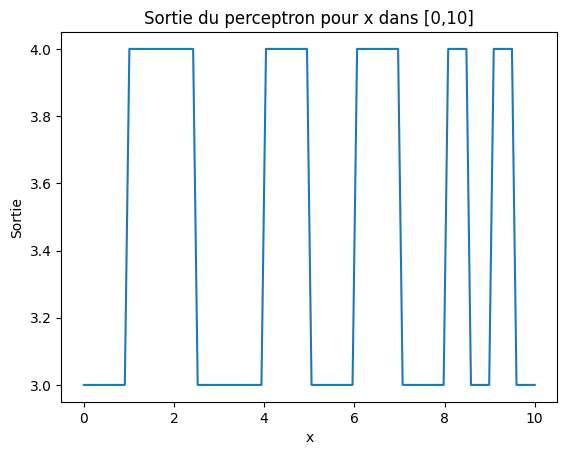

In [96]:
#a continuer
# Architecture du réseau
modele = Sequential()
# Couches de neurones
modele.add(Dense(10, input_dim=1, activation=heaviside))
modele.add(Dense(1, activation='linear'))

poids = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
biais = np.array([-1.0, -2.5, -4.0, -5.0, -6.0, -7.0, -8.0, -8.5, -9.0, -9.5])
modele.layers[0].set_weights([poids, biais])

poids = np.array([[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]])
biais = np.array([0])
modele.layers[1].set_weights([poids, biais])



liste_x = np.linspace(0, 10, num=100)
entree = np.array([[x] for x in liste_x]) # On transforme la liste en tableau numpy
sortie = modele.predict(entree) # On prédit la sortie
liste_y = np.array([y[0] for y in sortie]) # On transforme la sortie en liste

plt.plot(liste_x,liste_y) # On trace la courbe
plt.xlabel('x')
plt.ylabel('Sortie')
plt.title('Sortie du perceptron pour x dans [0,10]')
plt.show()

# Apprentissage automatique des poids

La librairie keras de tensorflow vous permet d'apprendre automatiquement les poids à l'aide d'un optimiseur.
Voici un exemple d'utilisation

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


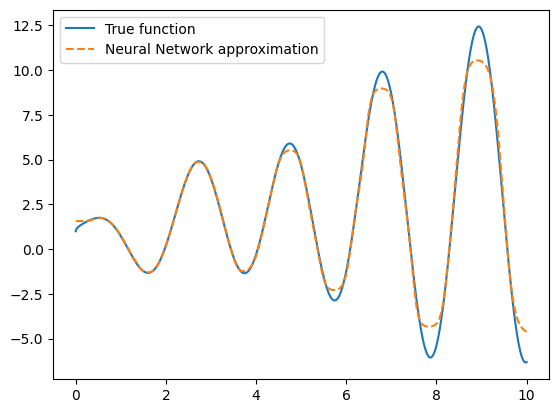

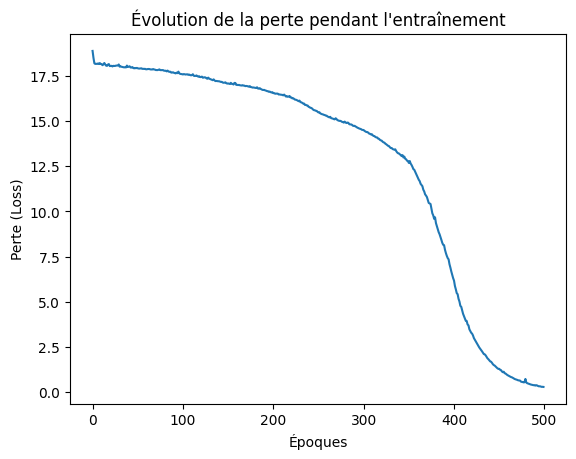

In [97]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Fonction à approximer
def f(x):
    return np.cos(2*x) + x*np.sin(3*x) + np.sqrt(x)

# Générer des données d'entraînement
x_train = np.linspace(0, 10, 1000)  # Entrées (1000 points entre 0 et 10)
y_train = f(x_train)  # Sorties correspondantes

x_train_scaled = x_train
y_train_scaled = y_train

# Architecture du modèle améliorée
modele = Sequential()

# Couches du modèle
modele.add(Dense(128, input_dim=1, activation='tanh'))  # Première couche avec 128 neurones et activation 'tanh'
modele.add(Dense(64, activation='tanh'))
modele.add(Dense(1, activation='linear'))  # Sortie avec 1 neurone et activation linéaire

# Compiler le modèle
modele.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
history = modele.fit(x_train_scaled, y_train_scaled, epochs=500, batch_size=32, verbose=0)

# Prédire avec le modèle entraîné
y_pred_scaled = modele.predict(x_train_scaled)

y_pred = y_pred_scaled

# Afficher les résultats
plt.plot(x_train, y_train, label='True function')
plt.plot(x_train, y_pred, label='Neural Network approximation', linestyle='dashed')
plt.legend()
plt.show()

# Afficher l'historique des pertes (loss) au fil des époques
plt.plot(history.history['loss'])
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (Loss)')
plt.show()


Décrire l'architecture du réseau

Modifier la fonction telle que $f(x)=cos(2*x) + x*sin(3*x)$
et comparer l'approximation

In [63]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Fonction à approximer
def f(x):
    return np.cos(2*x) + x*np.sin(3*x)

# Générer des données d'entraînement
x_train = np.linspace(0, 10, 1000)  # Entrées (1000 points entre 0 et 10)
y_train = f(x_train)  # Sorties correspondantes

x_train_scaled = x_train
y_train_scaled = y_train

# Architecture du modèle améliorée
modele = Sequential()

# Couches du modèle
modele.add(Dense(128, input_dim=1, activation='tanh'))  # Première couche avec 128 neurones et activation 'tanh'
modele.add(Dense(64, activation='tanh'))
modele.add(Dense(1, activation='linear'))  # Sortie avec 1 neurone et activation linéaire

# Compiler le modèle
modele.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
history = modele.fit(x_train_scaled, y_train_scaled, epochs=500, batch_size=32, verbose=0)

# Prédire avec le modèle entraîné
y_pred_scaled = modele.predict(x_train_scaled)

y_pred = y_pred_scaled

# Afficher les résultats
plt.plot(x_train, y_train, label='True function')
plt.plot(x_train, y_pred, label='Neural Network approximation', linestyle='dashed')
plt.legend()
plt.show()

# Afficher l'historique des pertes (loss) au fil des époques
plt.plot(history.history['loss'])
plt.title('Évolution de la perte pendant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte (Loss)')
plt.show()


KeyboardInterrupt: 